In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('~/Documents/M/pets/data/Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0.5, 1.0, 'Newspaper')

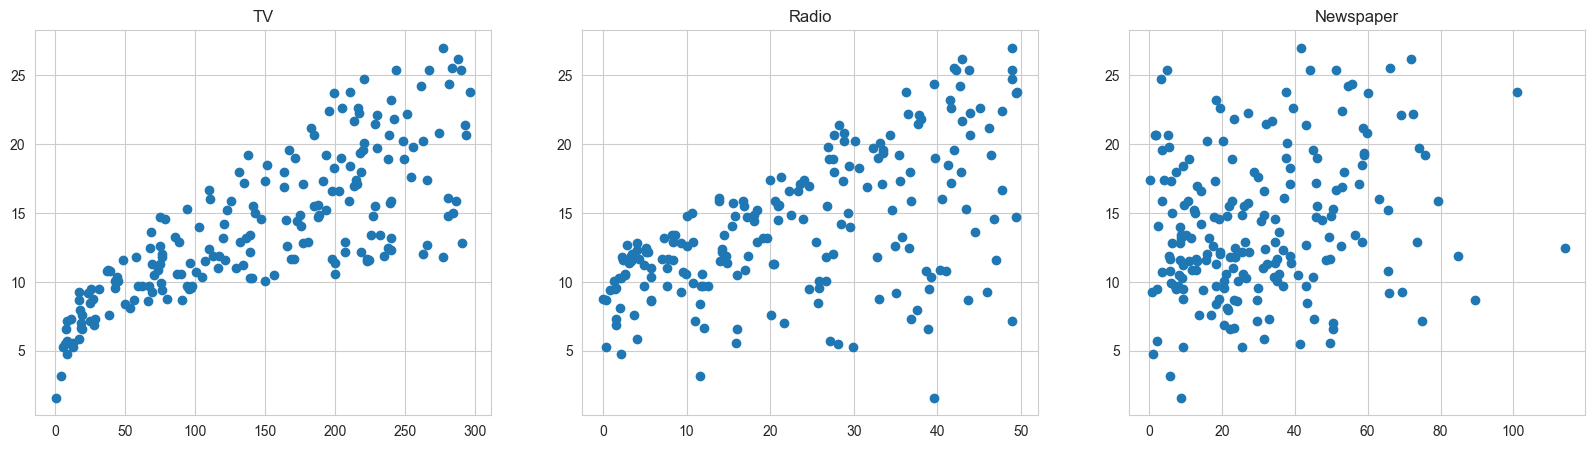

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].plot(df['TV'], df['sales'], 'o', label='TV')
axes[0].set_title('TV')

axes[1].plot(df['radio'], df['sales'], 'o', label='Radio')
axes[1].set_title('Radio')

axes[2].plot(df['newspaper'], df['sales'], 'o', label='TV')
axes[2].set_title('Newspaper')

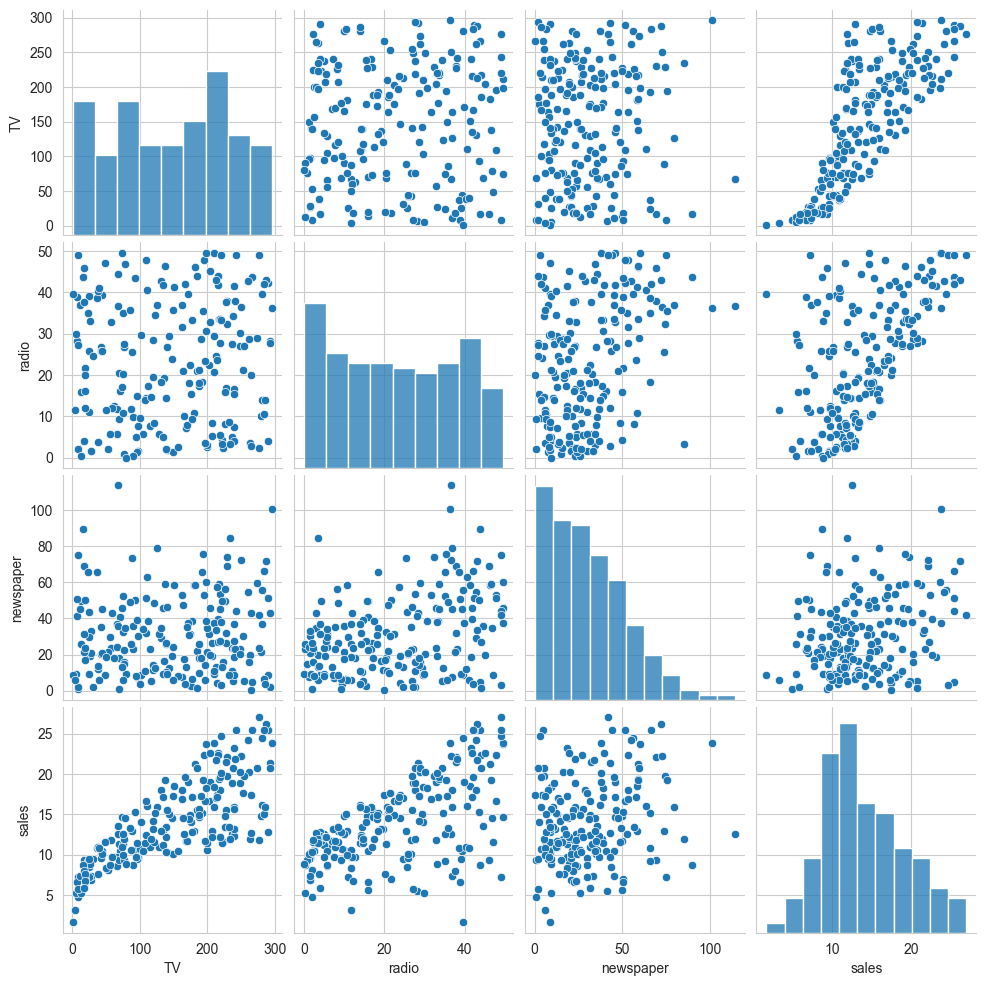

In [5]:
sns.pairplot(df)

In [6]:
X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [7]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [8]:
#разбиение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.shape

(134, 3)

In [10]:
y_train.shape

(134,)

In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [13]:
#Регрессия – когда модель предсказывает значение непрерывной переменной. Дискретная – классификация (категориальные данные?)

In [14]:
#вычисление метрик 

Одинаковые индексы

In [15]:
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [16]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: sales, dtype: float64

In [17]:
#как мы можем сравнить test_predictions и y_test? С помощью MAE, MSE, RMSE

In [18]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

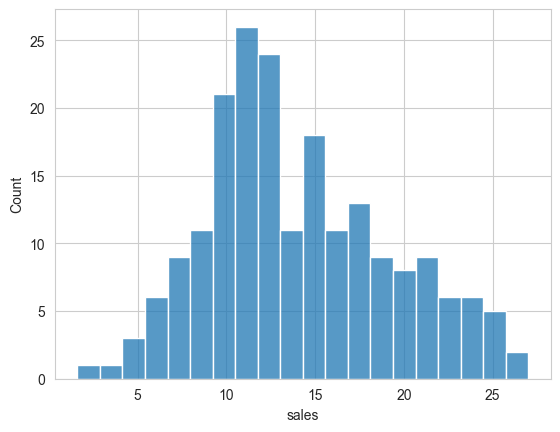

In [19]:
sns.histplot(df['sales'], bins=20)

In [20]:
mean_absolute_error(y_test, test_predictions)

1.4937750024728964

In [21]:
mean_squared_error(y_test, test_predictions)

3.727928330681508

In [22]:
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE

1.9307843822347197

In [23]:
#Ошибка в районе 10%. Насколько она допустима? Считаем приемлемым 

Анализ остатков

In [24]:
test_residuals = y_test - test_predictions
test_residuals

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: sales, Length: 66, dtype: float64

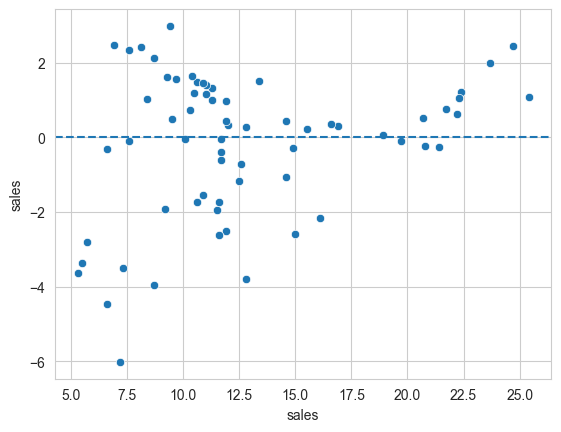

In [25]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, linestyle='--')

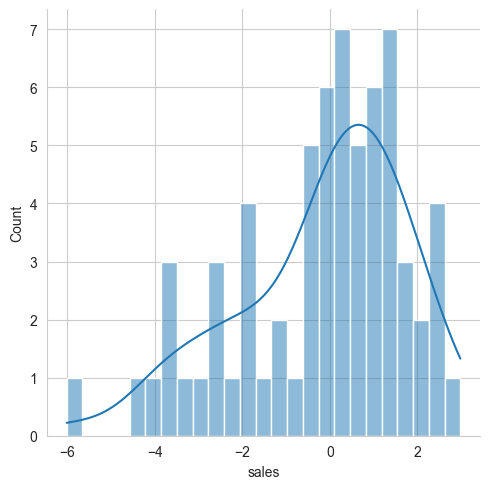

In [26]:
sns.displot(test_residuals, bins=25, kde=True)

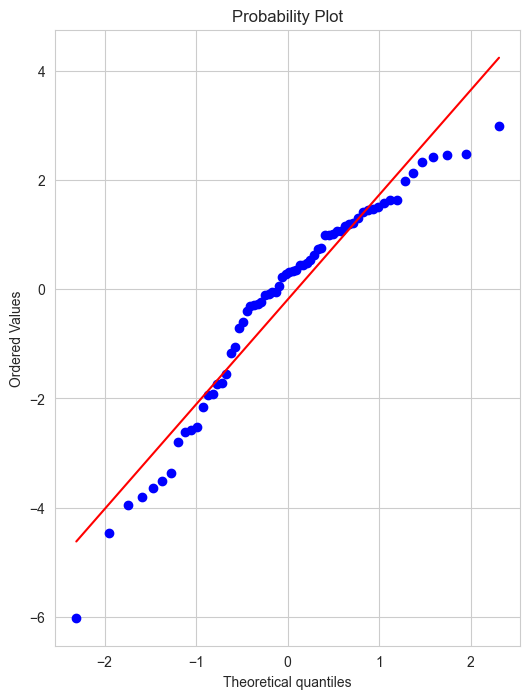

In [27]:
fix, ax = plt.subplots(figsize=(6, 8), dpi=100)

_ = sp.stats.probplot(test_residuals, plot=ax)

H0: нормальное распределение
H1: ненормальное распределение

Если pvalue < 0.05, то отвергаем H0. Распределение ненормальное

In [28]:
statistics, pvalue = stats.shapiro(test_residuals)
print(pvalue)
print(pvalue < 0.05)

0.0030269254224009282
True


Внедрение модели
- обучаем на всех данных

In [29]:
final_model = LinearRegression()

In [30]:
final_model.fit(X, y)

LinearRegression()

In [31]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

```0.04576465``` – если мы зафиксируем все остальные коэффициенты и будем менять только бюджет для TV, и каждый раз, как будем менять на 1 единицу измерения, то можем ожидать увеличения продаж товара на ```0.04576465``` единиц (тк это коэффициент)

Для отрицательных коэффициентов, если мы увеличиваем признак на 1 единицу, то мы можем ожидать уменьшения sales на ```-0.00103749```

In [32]:
y_hat = final_model.predict(X)

Text(0.5, 1.0, 'Newspaper')

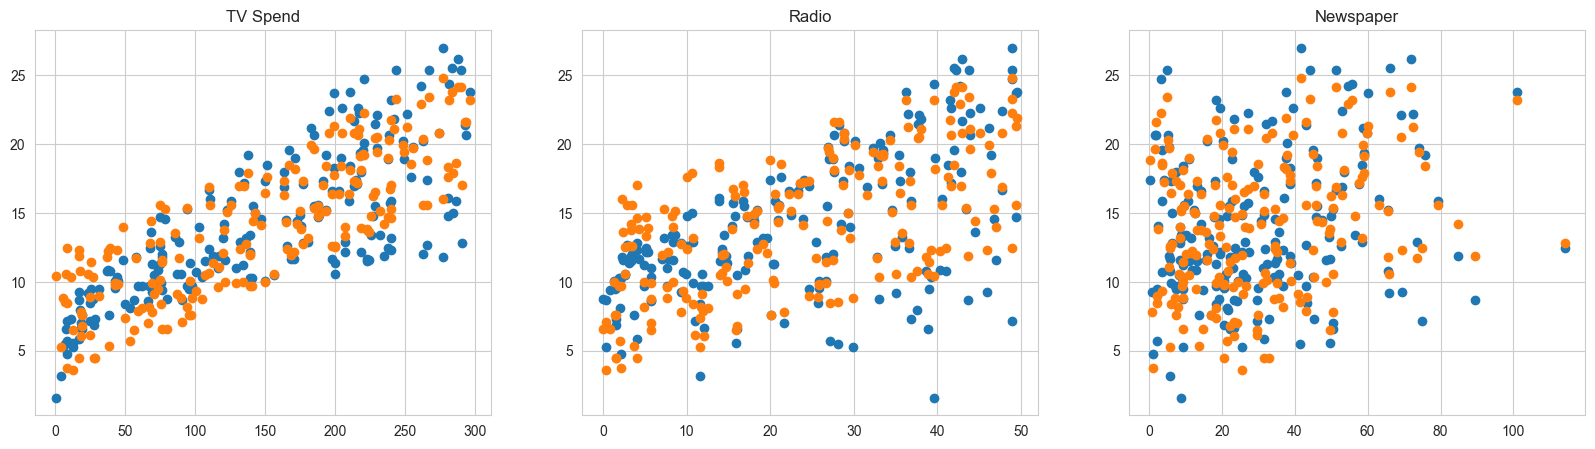

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

axes[0].plot(df['TV'], df['sales'], 'o', label='TV')
axes[0].plot(df['TV'], y_hat, 'o', label='TV')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o', label='Radio')
axes[1].plot(df['radio'], y_hat, 'o', label='Radio')
axes[1].set_title('Radio')

axes[2].plot(df['newspaper'], df['sales'], 'o', label='TV')
axes[2].plot(df['newspaper'], y_hat, 'o', label='Radio')
axes[2].set_title('Newspaper')

In [34]:
from joblib import dump, load

In [35]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [36]:
loaded_model = load('final_sales_model.joblib')

In [37]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [38]:
X.shape

(200, 3)

In [39]:
#149 TV, 22 radio, 12 Newspaper. Sales?
campaign = [[149, 22, 12]]

In [40]:
loaded_model.predict(campaign)

/Users/shvartz/Desktop/Капитал/IT strength/Karpov/analytics/venv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])